In [101]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Data Preprocessing

### Load the dataset

In [40]:
DATA_PATH = Path("data/raw/Housing-Kaggle.csv")
df = pd.read_csv(
    DATA_PATH,
    low_memory=False  # avoids dtype guessing issues on wide CSVs
)

### Handle any missing data

__Top missing-value columns__

In [74]:
na_counts = df.isna().sum().sort_values()
na_pct = (na_counts / len(df)).round(3)
missing_summary = pd.DataFrame({"na_count": na_counts, "na_pct": na_pct})
missing_summary.head(20)

,na_count,na_pct
price,0,0.0
area,0,0.0
bedrooms,0,0.0
bathrooms,0,0.0
stories,0,0.0
mainroad,0,0.0
guestroom,0,0.0
basement,0,0.0
hotwaterheating,0,0.0
airconditioning,0,0.0


No missing values found; no imputation needed

### EDA (Exploratory Data Analysis)

__Numeric summary stats__

In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


__Target distribution: `Price`__

Shows how prices are spread. If the right tail is long, the target is __right-skewed__

Skewed targets often benefit from modeling `log(price)`

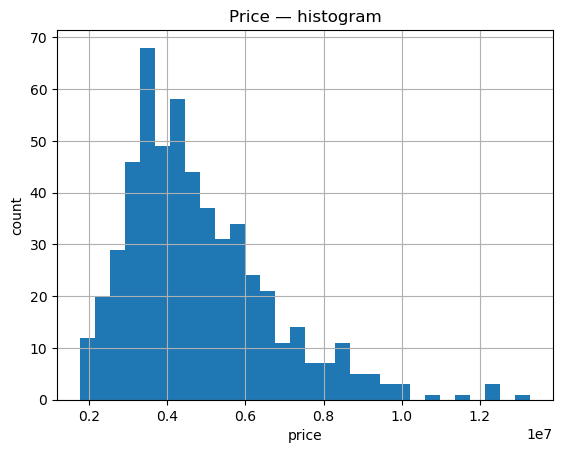

In [102]:
plt.figure()
df["price"].hist(bins=30)
plt.title("Price — histogram")
plt.xlabel("price"); plt.ylabel("count")
plt.savefig("outputs/figures/price_hist.png", dpi=160, bbox_inches="tight"); plt.show()

__Log target distribution: `log(price)`__

If this looks more bell-shaped than raw price, using `log(price)` can improve linear regression fit and stabilize errors

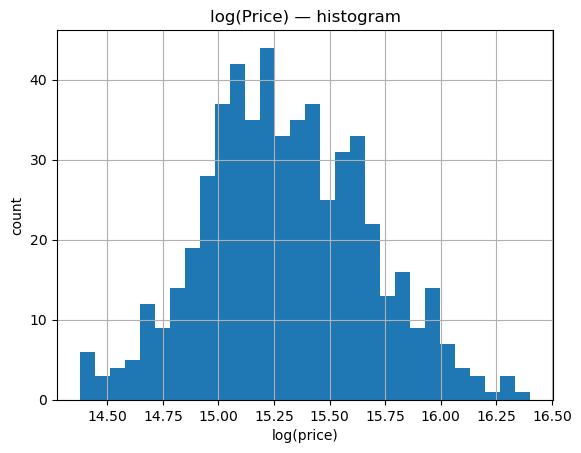

In [104]:
plt.figure()
np.log(df["price"]).hist(bins=30)
plt.title("log(Price) — histogram");
plt.xlabel("log(price)");
plt.ylabel("count")
plt.savefig("outputs/figures/log_price_hist.png", dpi=180, bbox_inches="tight");
plt.show()